In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Read in Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path = "/content/drive/My Drive/home-credit-default-risk"

In [ ]:
if os.path.exists(directory_path):
    print("Files and directories in '", directory_path, "' :")
    print(os.listdir(directory_path))
else:
    print("The directory does not exist:", directory_path)

Files and directories in ' /content/drive/My Drive/home-credit-default-risk ' :
['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [ ]:
# List files available
print(os.listdir("/content/drive/My Drive/home-credit-default-risk"))

['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [ ]:
# Training data
app_train = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
# Testing data features
app_test = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

# Exploratory Data Analysis

In [ ]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

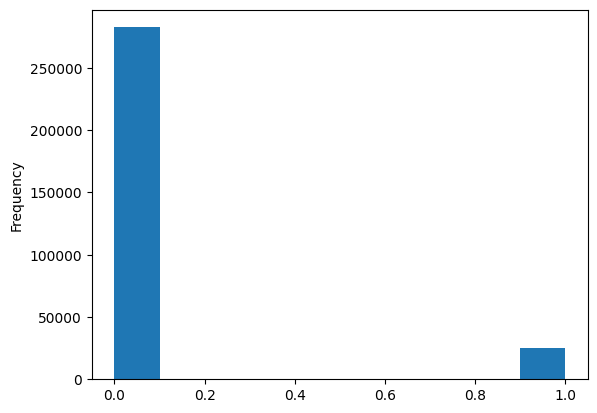

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
print(app_train.shape)
missing_values = missing_values_table(app_train)
missing_values.head(200)

(307511, 122)
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
...                                  ...                ...
EXT_SOURCE_2                         660                0.2
AMT_GOODS_PRICE                      278                0.1
AMT_ANNUITY                           12                0.0
CNT_FAM_MEMBERS                        2                0.0
DAYS_LAST_PHONE_CHANGE                 1                0.0

[67 rows x 2 columns]

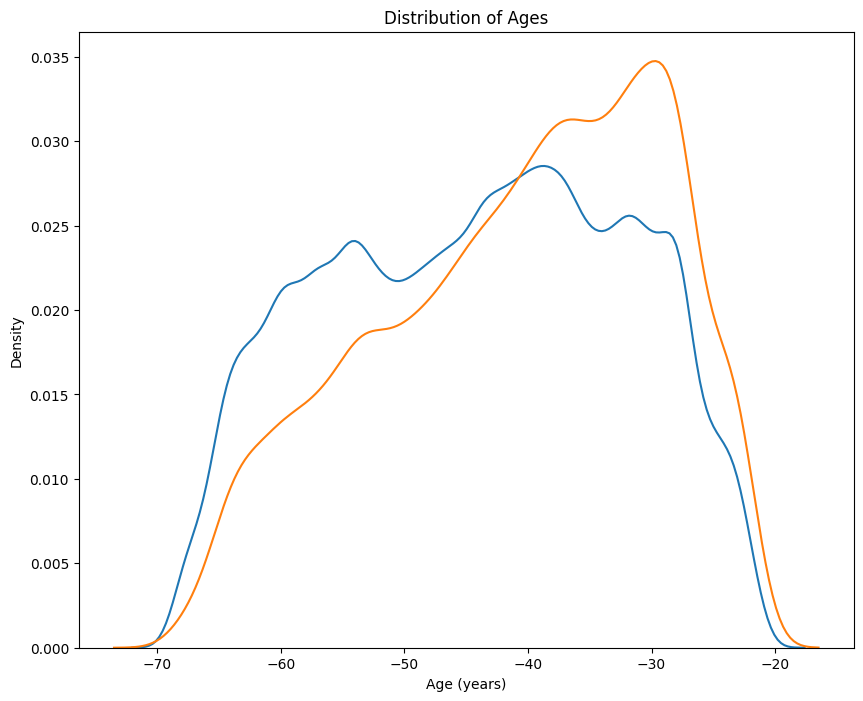

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

## Column Types

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(app_train.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#Label Encoding and One-Hot Encoding

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


#Aligning Training and Testing Data

In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


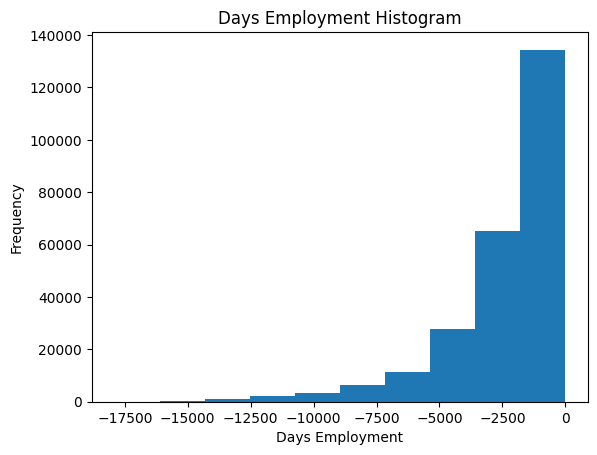

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## correlations

In [ ]:
app_train_x = app_train.drop('TARGET', axis=1)
app_train_x.corr()

SK_ID_CURR  \
SK_ID_CURR                                           1.000000   
NAME_CONTRACT_TYPE                                   0.001654   
FLAG_OWN_CAR                                         0.001216   
FLAG_OWN_REALTY                                      0.000703   
CNT_CHILDREN                                        -0.001129   
AMT_INCOME_TOTAL                                    -0.001820   
AMT_CREDIT                                          -0.000343   
AMT_ANNUITY                                         -0.000433   
AMT_GOODS_PRICE                                     -0.000232   
REGION_POPULATION_RELATIVE                           0.000849   
DAYS_BIRTH                                          -0.001500   
DAYS_EMPLOYED                                       -0.000084   
DAYS_REGISTRATION                                   -0.000973   
DAYS_ID_PUBLISH                                     -0.000384   
OWN_CAR_AGE                                          0.001818   
FLAG_MOBIL                                           0.002804   
FLAG_EMP_PHONE                                      -0.001337   
FLAG_WORK_PHONE                                     -0.000415   
FLAG_CONT_MOBILE                                     0.002815   
FLAG_PHONE                                           0.002753   
FLAG_EMAIL                                           0.000281   
CNT_FAM_MEMBERS                                     -0.002895   
REGION_RATING_CLIENT                                -0.001075   
REGION_RATING_CLIENT_W_CITY                         -0.001138   
HOUR_APPR_PROCESS_START                              0.000350   
REG_REGION_NOT_LIVE_REGION                          -0.000283   
REG_REGION_NOT_WORK_REGION                           0.001097   
LIVE_REGION_NOT_WORK_REGION                          0.002903   
REG_CITY_NOT_LIVE_CITY                              -0.001885   
REG_CITY_NOT_WORK_CITY                              -0.001582   
LIVE_CITY_NOT_WORK_CITY                              0.000067   
EXT_SOURCE_1                                         0.000082   
EXT_SOURCE_2                                         0.002342   
EXT_SOURCE_3                                         0.000222   
APARTMENTS_AVG                                       0.001556   
BASEMENTAREA_AVG                                    -0.002070   
YEARS_BEGINEXPLUATATION_AVG                          0.001551   
YEARS_BUILD_AVG                                      0.005900   
COMMONAREA_AVG                                      -0.001463   
ELEVATORS_AVG                                        0.004862   
ENTRANCES_AVG                                       -0.002879   
FLOORSMAX_AVG                                        0.004851   
FLOORSMIN_AVG                                        0.003083   
LANDAREA_AVG                                         0.001465   
LIVINGAPARTMENTS_AVG                                 0.003119   
LIVINGAREA_AVG                                       0.001770   
NONLIVINGAPARTMENTS_AVG                             -0.002575   
NONLIVINGAREA_AVG                                    0.003042   
APARTMENTS_MODE                                      0.001961   
BASEMENTAREA_MODE                                   -0.001411   
YEARS_BEGINEXPLUATATION_MODE                         0.001890   
YEARS_BUILD_MODE                                     0.005245   
COMMONAREA_MODE                                     -0.001058   
ELEVATORS_MODE                                       0.005017   
ENTRANCES_MODE                                      -0.002844   
FLOORSMAX_MODE                                       0.004386   
FLOORSMIN_MODE                                       0.002081   
LANDAREA_MODE                                        0.001548   
LIVINGAPARTMENTS_MODE                                0.003589   
LIVINGAREA_MODE                                      0.002156   
NONLIVINGAPARTMENTS_MODE                            -0.001923   
NONLIVINGAREA_MODE   

In [ ]:
corr_matrix = app_train_x.corr()

for i in range(len(corr_matrix.columns)):
    corr_matrix.iloc[i, i] = 0

corr_unstacked = corr_matrix.abs().unstack()
sorted_corr = corr_unstacked.sort_values(ascending=False)

top_10_correlations = sorted_corr.drop_duplicates().head(10)

print(top_10_correlations)

DAYS_EMPLOYED_ANOM          ORGANIZATION_TYPE_XNA         1.000000
CODE_GENDER_M               CODE_GENDER_F                 0.999971
ORGANIZATION_TYPE_XNA       FLAG_EMP_PHONE                0.999868
DAYS_EMPLOYED_ANOM          NAME_INCOME_TYPE_Pensioner    0.999648
NAME_INCOME_TYPE_Pensioner  FLAG_EMP_PHONE                0.999515
YEARS_BUILD_MEDI            YEARS_BUILD_AVG               0.998495
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998490
FLOORSMIN_AVG               FLOORSMIN_MEDI                0.997241
FLOORSMAX_AVG               FLOORSMAX_MEDI                0.997034
ENTRANCES_AVG               ENTRANCES_MEDI                0.996886
dtype: float64


#Linear Regression



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model  import LogisticRegression

# Splitting app_train into train and validation sets
train, valid = train_test_split(app_train, test_size=0.2, random_state=50)#, stratify=app_train['TARGET'])

train_labels = train['TARGET']
train = train.drop(columns=['TARGET'])

sensitive_feature_valid = valid['CODE_GENDER_M']

valid_labels = valid['TARGET']
valid = valid.drop(columns=['TARGET'])

# Feature names
features = list(train.columns)

# Imputation with median and scaling features to range 0-1
imputer = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0, 1))


# Fit and transform training data
train = imputer.fit_transform(train)
train = scaler.fit_transform(train)

# Transform validation data
valid = imputer.transform(valid)
valid = scaler.transform(valid)

# Train LinearRegression model
log_reg = LogisticRegression(C=0.001)
log_reg.fit(train,train_labels)

# Predict on validation data
valid_preds = log_reg.predict(valid)
valid_prob_preds = log_reg.predict_proba(valid)[:, 1]

# Calculating metrics
accuracy = accuracy_score(valid_labels, valid_preds)
precision = precision_score(valid_labels, valid_preds)
conf_matrix = confusion_matrix(valid_labels, valid_preds)
tn, fp, fn, tp = conf_matrix.ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'False Positive Rate (FPR): {fpr}')
print(f'False Negative Rate (FNR): {fnr}')

Accuracy: 0.920231533421134
Precision: 0.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 1.0


AUC-ROC: 0.7296690872128366


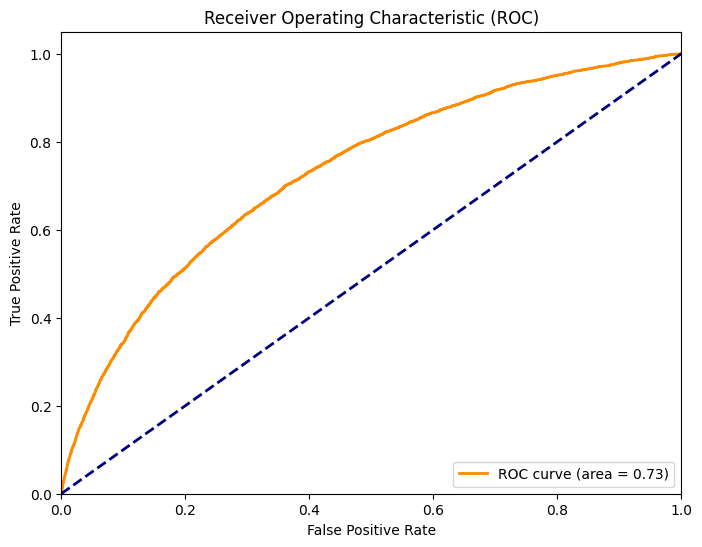

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'valid_prob_preds' are the predicted probabilities of the positive class
# 'valid_labels' should be the true binary labels

# Calculate AUC-ROC
auc_roc = roc_auc_score(valid_labels, valid_prob_preds)
print(f"AUC-ROC: {auc_roc}")

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(valid_labels, valid_prob_preds)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

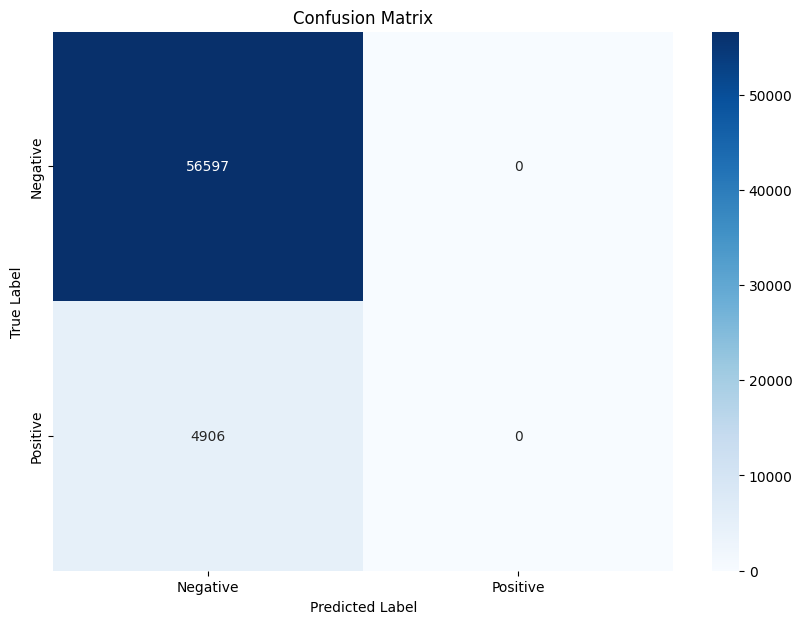

In [ ]:
!pip install matplotlib seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming valid_labels and valid_preds are already defined
# where valid_labels are the true class labels and valid_preds are the predictions made by the model

# Compute the confusion matrix
cm = confusion_matrix(valid_labels, valid_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Assume valid_labels are your true binary labels and valid_prob_preds are your model's probability outputs
fpr, tpr, thresholds = roc_curve(valid_labels, valid_prob_preds)

# Calculate the G-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest G-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Alternatively, calculate the Euclidean distance to the top-left corner
sqrt_dist = np.sqrt((1-tpr)**2 + fpr**2)
optimal_idx = np.argmin(sqrt_dist)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold based on Euclidean Distance=%f' % optimal_threshold)

Best Threshold=0.087865, G-Mean=0.669
Optimal Threshold based on Euclidean Distance=0.085258


Accuracy: 0.6853974602864901
Precision: 0.15299601172456873
Recall: 0.6490012229922544
F1 Score: 0.2476183069564879
AUC-ROC: 0.7296690872128366


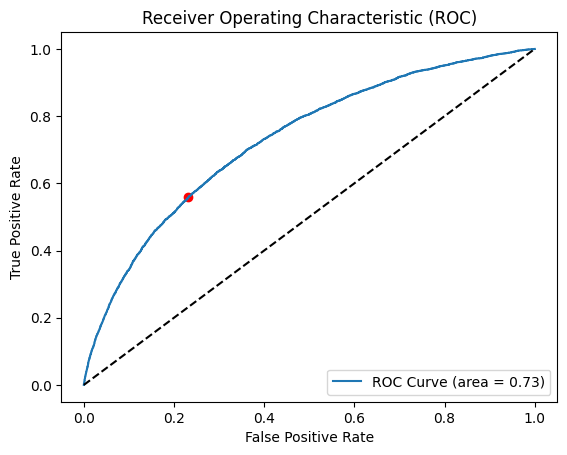

In [ ]:
import numpy as np

# Assuming `valid_prob_preds` are the predicted probabilities for the positive class
valid_preds1 = (valid_prob_preds >= 0.087865).astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# True labels are assumed to be in `valid_labels`
accuracy = accuracy_score(valid_labels, valid_preds1)
precision = precision_score(valid_labels, valid_preds1)
recall = recall_score(valid_labels, valid_preds1)
f1 = f1_score(valid_labels, valid_preds1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
auc_roc = roc_auc_score(valid_labels, valid_prob_preds)
print("AUC-ROC:", auc_roc)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(valid_labels, valid_prob_preds)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

# Dot for chosen threshold
chosen_fpr = fpr[np.where(thresholds >= 0.1)[-1][-1]]
chosen_tpr = tpr[np.where(thresholds >= 0.1)[-1][-1]]
plt.scatter(chosen_fpr, chosen_tpr, color='red')  # Mark the chosen threshold on the curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

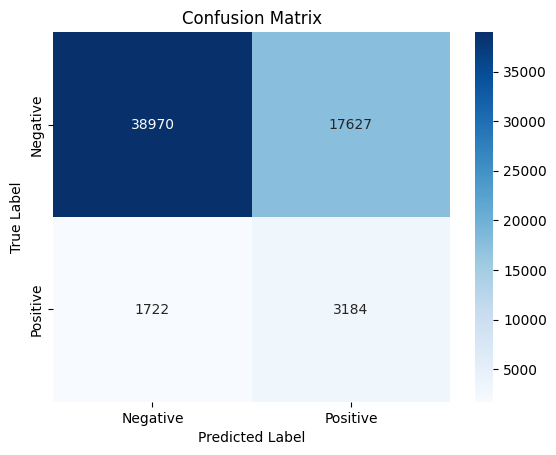

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `valid_preds` are the binary predictions obtained by applying the threshold
# and `valid_labels` are your true labels
cm = confusion_matrix(valid_labels, valid_preds1)

# Optionally, you can label the classes if they have specific names
class_names = ['Negative', 'Positive']  # Adjust class names accordingly plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.adversarial import AdversarialFairnessClassifier
from fairlearn.metrics import MetricFrame
import fairlearn.datasets as fdata
from fairlearn.metrics import (demographic_parity_difference, demographic_parity_ratio,
                               selection_rate_difference, false_negative_rate_difference,
                               false_positive_rate_difference, equalized_odds_ratio,
                               false_negative_rate, false_positive_rate,equalized_odds_difference)
import pandas as pd


In [ ]:
metric_dict = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'FNR': false_negative_rate,
    'FPR': false_positive_rate,
    'FNR_diff':false_negative_rate_difference,
    'FPR_diff':false_positive_rate_difference,
    'demographic_parity_ratio':demographic_parity_ratio,
    'equalized_odds_ratio': equalized_odds_ratio,
    'selection_rate_difference':selection_rate_difference
}

sample_params = {
    'FNR_diff': {'sensitive_features': sensitive_feature_valid},
    'FPR_diff': {'sensitive_features': sensitive_feature_valid},
    'demographic_parity_ratio': {'sensitive_features': sensitive_feature_valid},
    'equalized_odds_ratio': {'sensitive_features': sensitive_feature_valid},
    'selection_rate_difference': {'sensitive_features': sensitive_feature_valid}
}

metrics = MetricFrame(metrics=metric_dict,
                      y_true=valid_labels,
                      y_pred=valid_preds1,
                      sensitive_features=sensitive_feature_valid,
                      sample_params=sample_params)

print("Fairness Metrics by Group:")
print(metrics.by_group)

print("\nOverall Metrics:")
print(metrics.overall)

Fairness Metrics by Group:
               accuracy  precision       FNR       FPR  FNR_diff  FPR_diff  \
CODE_GENDER_M                                                                
False          0.754954   0.152397  0.444088  0.230225       0.0       0.0   
True           0.551087   0.153577  0.226406  0.473631       0.0       0.0   

               demographic_parity_ratio  equalized_odds_ratio  \
CODE_GENDER_M                                                   
False                               1.0                   1.0   
True                                1.0                   1.0   

               selection_rate_difference  
CODE_GENDER_M                             
False                                0.0  
True                                 0.0  

Overall Metrics:
accuracy                     0.685397
precision                    0.152996
FNR                          0.350999
FPR                          0.311448
FNR_diff                     0.217682
FPR_diff           

#Shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.3 MB/s eta 0:00:00


In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from IPython.display import Image
from IPython.core.display import HTML
import operator
from collections import defaultdict
shap.initjs()

In [ ]:
valid.shape

(61503, 240)

In [ ]:
train.shape

(246008, 240)

In [ ]:
'''
explainer = shap.Explainer(log_reg,background_data, feature_perturbation='interventional')
pbar = tqdm(total=len(sampled_valid), desc='Calculating SHAP Values')

def with_progress_bar(explainer, sampled_valid):
    shap_values = []
    for i in range(len(sampled_valid)):
        sv = explainer.shap_values(sampled_valid[i:i+1])  # Use standard numpy slicing
        shap_values.append(sv)
        pbar.update(1)
    pbar.close()
    return shap_values

shap_values = with_progress_bar(explainer, sampled_valid)
#shap_values = explainer.shap_values(sampled_valid)
'''

"\nexplainer = shap.Explainer(log_reg,background_data, feature_perturbation='interventional')\npbar = tqdm(total=len(sampled_valid), desc='Calculating SHAP Values')\n\ndef with_progress_bar(explainer, sampled_valid):\n    shap_values = []\n    for i in range(len(sampled_valid)):\n        sv = explainer.shap_values(sampled_valid[i:i+1])  # Use standard numpy slicing\n        shap_values.append(sv)\n        pbar.update(1)\n    pbar.close()\n    return shap_values\n\nshap_values = with_progress_bar(explainer, sampled_valid)\n#shap_values = explainer.shap_values(sampled_valid)\n"

In [ ]:
explainer=shap.LinearExplainer(log_reg,train)
shap_values=explainer.shap_values(valid)

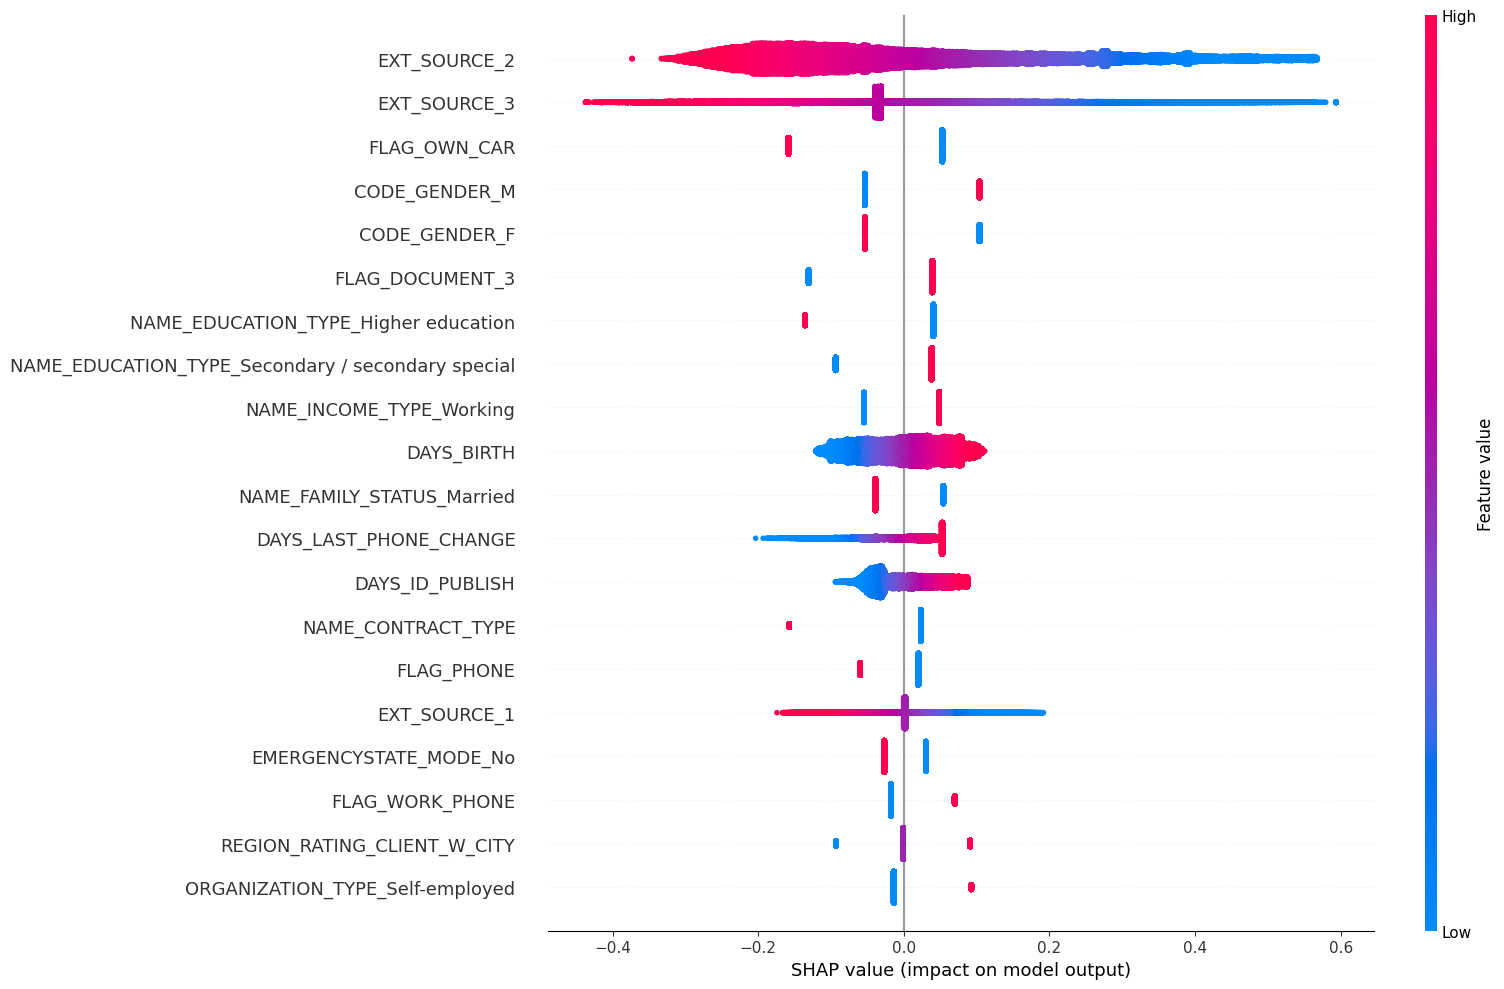

In [ ]:
shap.summary_plot(shap_values,valid, feature_names=features[:-1], plot_type='dot', plot_size=(16,10))

In [ ]:
fp_indices = np.where((valid_labels == 0) & (valid_preds1 == 1))[0]
fn_indices = np.where((valid_labels == 1) & (valid_preds1 == 0))[0]

# Optionally, print out some of these indices to check
print("Sample FP indices:", fp_indices[:5])
print("Sample FN indices:", fn_indices[:5])

fp_index = fp_indices[4]
fn_index = fn_indices[4]

Sample FP indices: [ 0  1  5  6 14]
Sample FN indices: [ 78  84  92 179 202]


In [ ]:
shap.initjs()
print("For index(false negative): ",fn_index)
print("Predicted Label", valid_preds1[fn_index],"Repaid")
print("Actual Label",valid_labels.iloc[fn_index],"Not repaid")

force_plot1=shap.force_plot(
    explainer.expected_value, shap_values[fn_index], valid[fn_index],
    feature_names=features[:-1]
)
display(force_plot1)

For index(false negative):  202
Predicted Label 0 Repaid
Actual Label 1 Not repaid


In [ ]:
shap.initjs()
print("For index(false positive): ",fp_index)
print("Predicted Label", valid_preds1[fp_index],"Not Repaid")
print("Actual Label",valid_labels.iloc[fp_index],"Repaid")

force_plot2=shap.force_plot(
    explainer.expected_value, shap_values[fp_index], valid[fp_index],
    feature_names=features[:-1]
)
display(force_plot2)

For index(false positive):  14
Predicted Label 1 Not Repaid
Actual Label 0 Repaid
